time    datetime64[ns]
dtype: object


loop1:   0%|          | 0/4 [00:00<?, ?it/s]

ERROR - Exception
Traceback (most recent call last):
  File "C:\Users\ytian\miniconda3\envs\localds2\Lib\site-packages\IPython\core\interactiveshell.py", line 3699, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ytian\AppData\Local\Temp\ipykernel_20840\3455512748.py", line 30, in <module>
    fig.show()
    ^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'show'
AttributeError: 'NoneType' object has no attribute 'show'

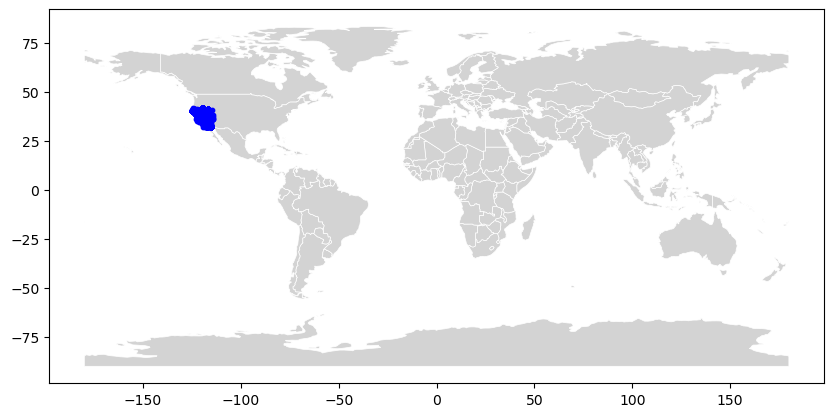

In [1]:
import pandas as pd
from ads.dataset.factory import DatasetFactory

url = (
    "https://earthquake.usgs.gov/fdsnws/event/1/query?"
    "format=csv"
    "&starttime=2024-01-01&endtime=2025-10-07"     # adjust dates
    "&minmagnitude=2.5"
    "&minlatitude=32&maxlatitude=42.1"             # CA lat range
    "&minlongitude=-125&maxlongitude=-114"         # CA lon range
    "&orderby=time-asc"
)
ca_eq = pd.read_csv(url)
ca_eq.head()

# 1) Load (already done in your notebook) and normalize datetime columns to naive UTC
for col in ("time", "updated"):
    if col in ca_eq.columns:
        s = pd.to_datetime(ca_eq[col], errors="coerce", utc=True)
        # drop timezone info, keep UTC clock time
        ca_eq[col] = s.dt.tz_convert(None)

print(ca_eq[["time"]].dtypes)  # should show datetime64[ns] (no timezone)

ds = DatasetFactory.from_dataframe(ca_eq)
fig = ds.plot_gis_scatter(
    lon="longitude",
    lat="latitude"
)
fig.show()

